# Tensorflow/Keras for Classification

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# We use the Breast Cancer Wisconsin (Diagnostic) Dataset
# https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+(Diagnostic)

In [10]:
df = pd.read_csv('../data/cancer_classification.csv')

### 1. Data Exploration

In [9]:
# Check if any nulls, etc.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   mean radius              569 non-null    float64
 1   mean texture             569 non-null    float64
 2   mean perimeter           569 non-null    float64
 3   mean area                569 non-null    float64
 4   mean smoothness          569 non-null    float64
 5   mean compactness         569 non-null    float64
 6   mean concavity           569 non-null    float64
 7   mean concave points      569 non-null    float64
 8   mean symmetry            569 non-null    float64
 9   mean fractal dimension   569 non-null    float64
 10  radius error             569 non-null    float64
 11  texture error            569 non-null    float64
 12  perimeter error          569 non-null    float64
 13  area error               569 non-null    float64
 14  smoothness error         5

In [11]:
# Explore mean/min/max values for each feature
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


<AxesSubplot:xlabel='benign_0__mal_1', ylabel='count'>

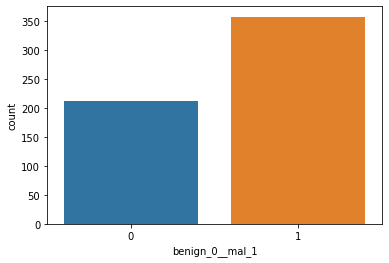

In [14]:
# Are class counts well balanced?
sns.countplot(data=df,x='benign_0__mal_1')

<AxesSubplot:>

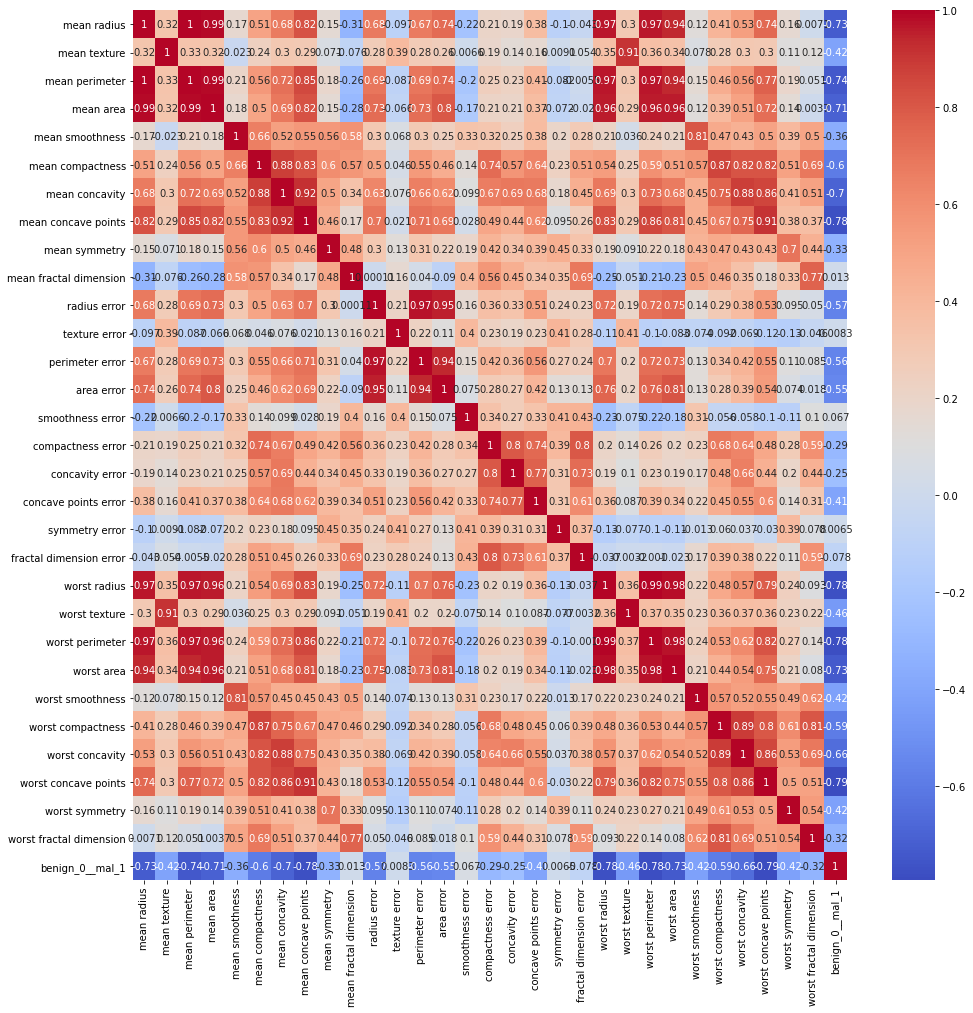

In [20]:
# What do correlations look like?
plt.figure(figsize=(16,16))
sns.heatmap(df.corr(),annot=True,cmap='coolwarm')

<AxesSubplot:>

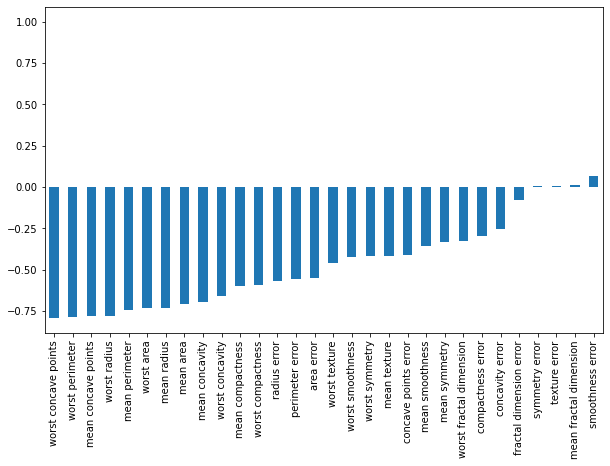

In [26]:
# Which are the highest correlated values with the diagnosis?
# High negative correlations appear
plt.figure(figsize=(10,6))
#df.corr()['benign_0__mal_1'].sort_values().plot(kind='bar')
df.corr()['benign_0__mal_1'].drop('benign_0__mal_1').sort_values().plot(kind='bar')

#### Extract features and target

In [29]:
X = df.drop('benign_0__mal_1',axis=1).values
y = df['benign_0__mal_1'].values

In [30]:
# Train/test spli
from sklearn.model_selection import train_test_split

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [33]:
# Scale
from sklearn.preprocessing import MinMaxScaler

In [34]:
scaler = MinMaxScaler()

In [35]:
X_train = scaler.fit_transform(X_train)

In [36]:
X_test = scaler.transform(X_test)

### 2. Create and Train Model

In [37]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [46]:
# Since we have 30 features, it makes sense to use 30 input neurons
X_train.shape

(426, 30)

In [47]:
# Some guidelines concerning MLPs
# Number of input neurons: number of features
# Number of output neurons: target value size: number of classes, number of continuous values, etc.
# Hidden layers
# - Number of layers: rule of thumb: usually 1 or max 2
# - Number of neurons: close to the mean between input and output
# Use dropout to prevent overfitting
# Use early stopping with the validation data
# Batch size
# - large batch sizes result in faster training
# - but the model fails to generalize when large batch sizes used

#### Model 1: No measures for overfitting

In [40]:
model = Sequential()

# Decrease the number of neurons in each layer
model.add(Dense(30,activation='relu'))
model.add(Dense(15,activation='relu'))
# Binary classification: we need the sigmoid to map the values to [0,1]
model.add(Dense(1,activation='sigmoid'))

In [41]:
model.compile(loss='binary_crossentropy',optimizer='adam')

In [ ]:
model.fit(x=X_train,y=y_train,epochs=600,validation_data=(X_test,y_test))

In [44]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

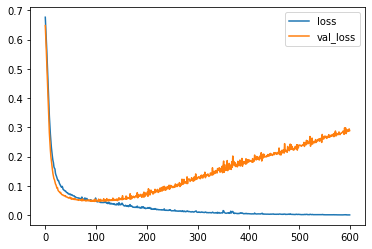

In [45]:
# Validation and training loss differentiate from each other from epoch 100 on
# Validation loss increases because we're overfitting - perfect example
losses.plot()

#### Model 2: Early Stopping

In [48]:
model = Sequential()
model.add(Dense(units=30,activation='relu'))
model.add(Dense(units=15,activation='relu'))
model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [49]:
# Early stopping when validation loss stops decreasing
# Early stop is achieved by callbacks
from tensorflow.keras.callbacks import EarlyStopping

In [50]:
# Arguments:
# - monitor: value to be monitored -> val_loss: loss of validaton data
# - mode: min -> training stops when monitored value stops decreasing
# - patience: number of epochs with no improvement after which training will be stopped
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [52]:
#help(EarlyStopping)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

In [54]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

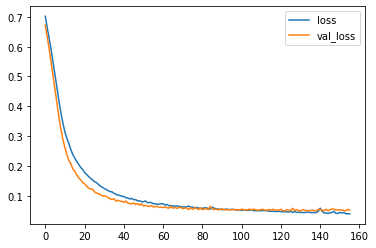

In [55]:
# The training stops before epoch 160, when the validation loss stops decreasing
losses.plot()

#### Model 3: Dropout + Early Stopping

In [56]:
# Add Dropout layers after input and hidden layers
# 
model = Sequential()

model.add(Dense(units=30,activation='relu'))
model.add(Dropout(0.5)) # probability of each neuron to drop: 0.5

model.add(Dense(units=15,activation='relu'))
model.add(Dropout(0.5)) # probability of each neuron to drop: 0.5

model.add(Dense(units=1,activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam')

In [57]:
# Early stopping when validation loss stops decreasing
early_stop = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=25)

In [ ]:
model.fit(x=X_train, 
          y=y_train, 
          epochs=600,
          validation_data=(X_test, y_test), verbose=1,
          callbacks=[early_stop]
          )

In [59]:
losses = pd.DataFrame(model.history.history)

<AxesSubplot:>

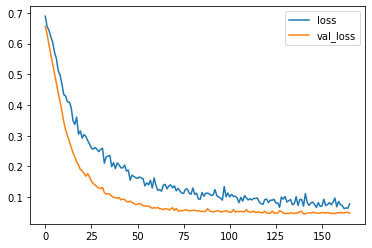

In [60]:
# The development of the losses is much better now
losses.plot()

### 3. Evaluate model

In [62]:
# Old-style class predictions:
# predictions = model.predict_classes(X_test)
# Multiclass classification with softmax in last layer
# np.argmax(model.predict(X_test), axis=-1)
# Binary classification with sigmoid in last layer
prediction = (model.predict(X_test) > 0.5).astype("int32")

In [64]:
from sklearn.metrics import classification_report,confusion_matrix

In [65]:
print(confusion_matrix(y_test, prediction))

[[52  2]
 [ 0 89]]


In [66]:
print(classification_report(y_test, prediction))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98        54
           1       0.98      1.00      0.99        89

    accuracy                           0.99       143
   macro avg       0.99      0.98      0.99       143
weighted avg       0.99      0.99      0.99       143

